# Созание AI - помощника "Божья коровка"

## Команда:

Левицкая Елизавета
Новикова Алена
Петрович Даниил
Султанов Мирзомансурхон
Шаплыко Кирилл 


### Цели создания продукта
1. Сократить трудозатраты аналитиков на предоставление данных по пользовательским запросам
2. Обеспечить пользователям возможность оперативного доступа к информации о вакансиях с получением статистических данных без необходимости обращение к ИТ-подразделению
3. Сократить расходы на предоставление данных по вакансиям за счет исключения из цепочки Аналитиков (по простым запросам)

### Ограничение
1. Помощник умеет работать только с локальной БД (= файлик с вакансиями), не предполагается при выполнении запроса обогащать информацию БД чем-либо, кроме расчетных данных
2. Снижается нагрузка на Аналитиков, но Аналитик не исключается из процесса полностью: Помощник релевантно и точно обрабатывает числовые показатели в простых запросах и запросах средней сложности. В случае необходимости выполнения сложных многоэтапных расчетов к запросу потрубется привлечение аналитиков.

# Технический долг:
1. Функция проверки полученного из LLM кода на предмет безопасности: планируется создать функцию, которая будет проверять код, предлагаемый LLM, ограничивая таким образом права. Предполагается, что для кода из LLM доступна только выборка данных из БД без возможности их изменения.
2. Обогащение данных: Планируется продолжить нормализацию данных для повышения точности результатов. В частности, сейчас нет отдельных полей, унифицирующих названия вакансий по смыслу (понять, что названия разные, но по факту должность одна и та же). Также в процессе нормализации из структуры датафрейма была исключена часть неоднозначных столбцов, оставлены только данные, необходимые для MVP.
3. Полнотекстовый поиск: в текущей реализации помощник не предполагает возможности полнотекстового поиска, например, по ключевым словам из описания вакансии. Эта возможность будет включена в следующие релизы.

# Архитектура

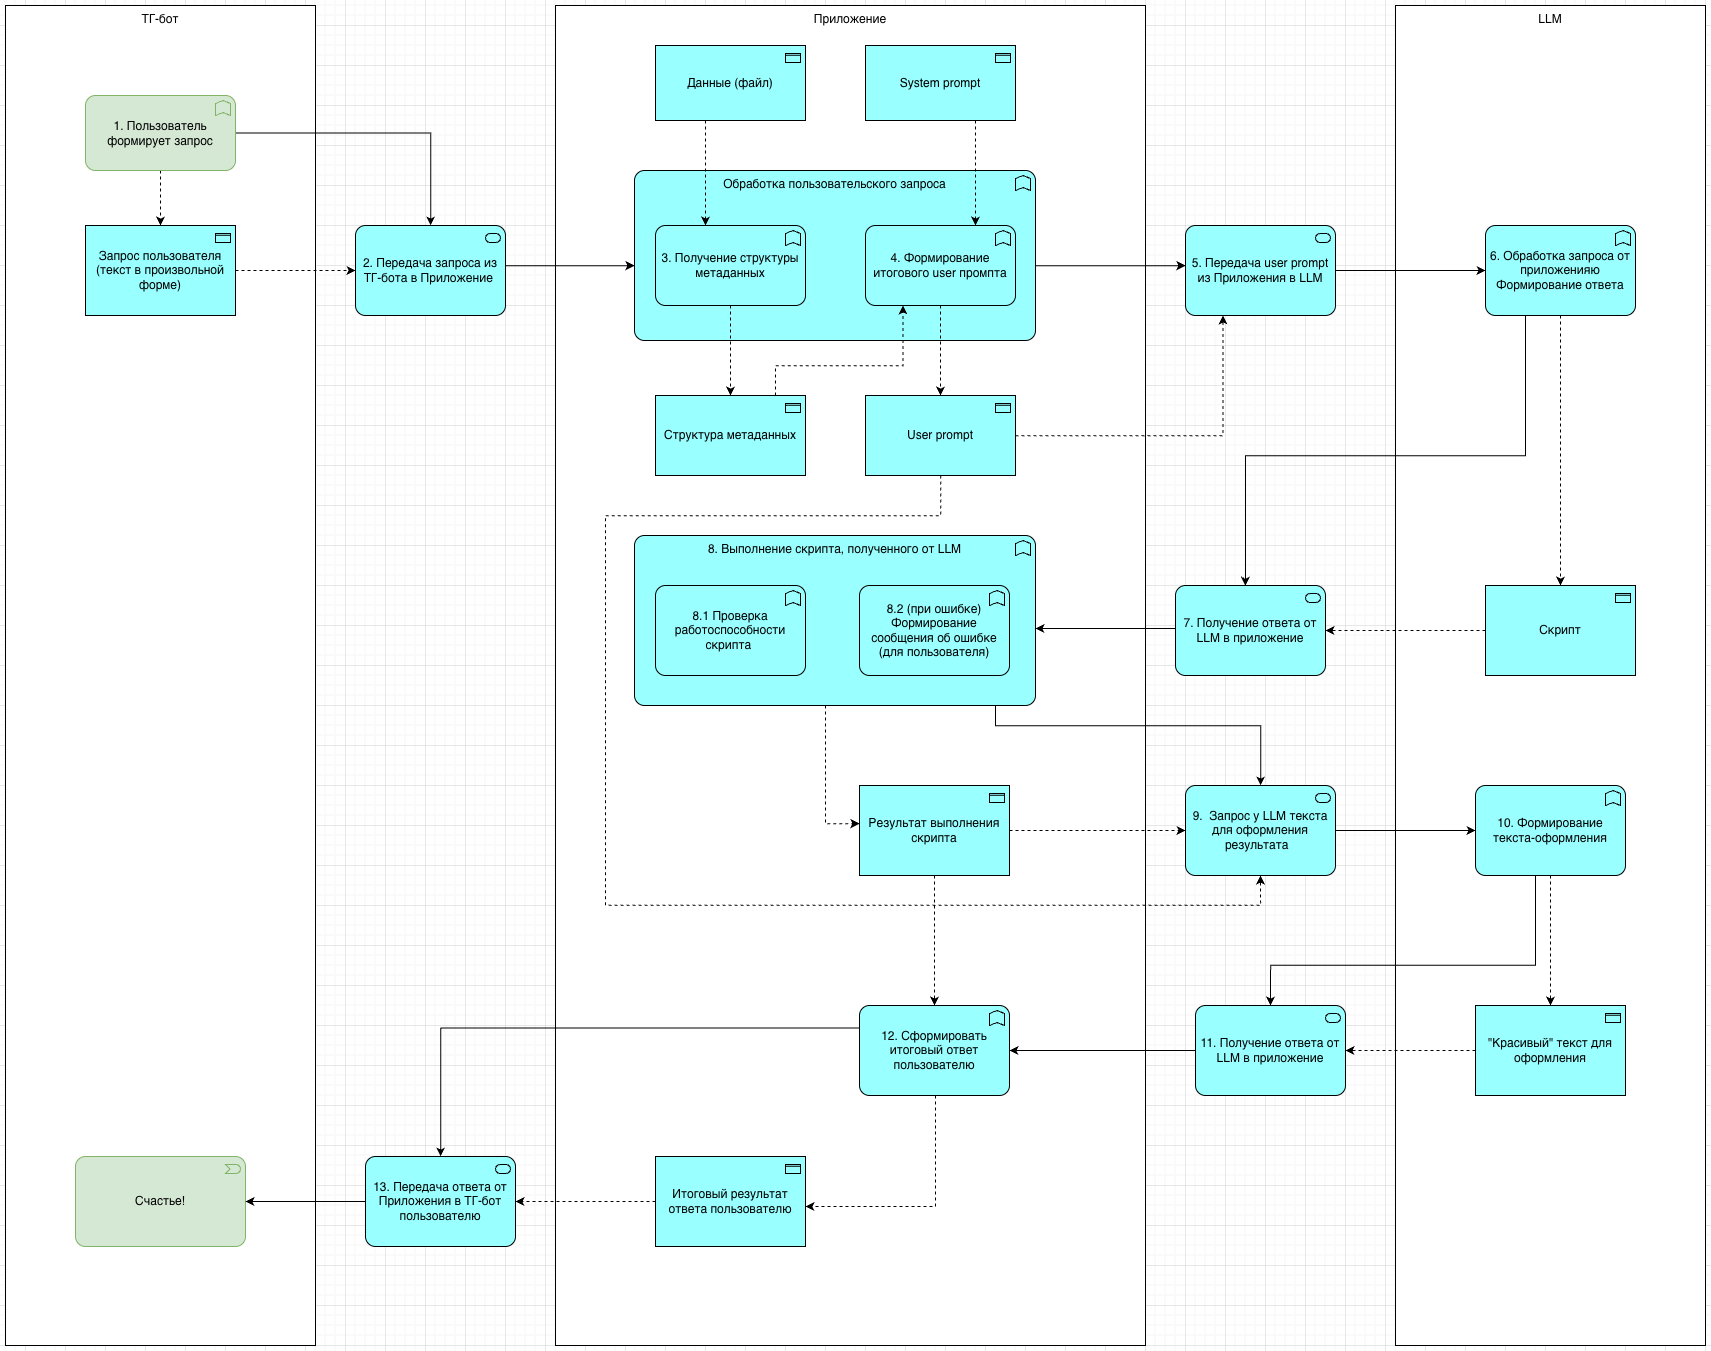

In [21]:
import pandas as pd
df = pd.read_json('o.json')

df.head(20)


,vacancy_id,published_at,published_year,published_month,is_active,offer_type,source_type,position,specialization,seniority,...,salary_is_total_comp,salary_hidden,primary_city,primary_country,is_remote,is_relocate,company_name,company_industry,company_size_min,company_size_max
0,20000,2024-06-24,2024.0,2024-06,0.0,vacancy,web_and_tg,Эксперт по защите информации / внедрению СЗИ,Information Security,middle,...,False,False,Москва,Россия,False,False,getmatch agency,Рекрутинговое агентство,11.0,50.0
1,20001,2024-08-05,2024.0,2024-08,0.0,vacancy,web_and_tg,Руководитель IT-проектов,Project Management,lead,...,False,False,Москва,Россия,False,False,АТОЛ Тахографы Drive,Продуктовая компания,NaN,NaN
2,20002,2024-06-24,2024.0,2024-06,0.0,vacancy,web_and_tg,Senior Data Infrastructure Engineer,DevOps,senior,...,False,False,None,None,True,False,Островок,Продуктовая компания,1001.0,NaN
3,20003,2024-10-17,2024.0,2024-10,0.0,vacancy,web_and_tg,1С-разработчик ЗУП (1С-Core),1C,senior,...,True,True,Воронеж,Россия,True,False,Т-Банк,Банки / Финтех,1001.0,NaN
4,20004,2024-06-26,2024.0,2024-06,0.0,vacancy,web_and_tg,Архитектор платформы данных,Data Engineering,senior,...,False,False,Москва,Россия,True,False,НЛМК направление IT&Digital,Программное обеспечение,1001.0,NaN
5,20005,2024-06-25,2024.0,2024-06,0.0,vacancy,web_and_tg,Старший разработчик DWH / Data Engineer (Hadoop),Data Engineering,middle,...,False,False,Москва,None,True,False,НЛМК направление IT&Digital,Программное обеспечение,1001.0,NaN
6,20006,2024-06-25,2024.0,2024-06,0.0,vacancy,web_and_tg,Ведущий архитектор решений (IDM),Architect,senior,...,False,False,Москва,Россия,False,False,НЛМК направление IT&Digital,Программное обеспечение,1001.0,NaN
7,20007,2024-06-25,2024.0,2024-06,0.0,vacancy,web_and_tg,Системный аналитик,System Analyst,senior,...,False,False,Москва,None,True,False,НЛМК направление IT&Digital,Программное обеспечение,1001.0,NaN
8,20008,NaT,NaN,None,0.0,vacancy,web_and_tg,ABAP-разработчик,ABAP,senior,...,False,False,Москва,None,True,False,НЛМК направление IT&Digital,Программное обеспечение,1001.0,NaN
9,20009,2024-06-25,2024.0,2024-06,0.0,vacancy,web_and_tg,Delivery Manager,Project Manager,middle,...,False,False,Москва,Россия,False,False,НЛМК направление IT&Digital,Программное обеспечение,1001.0,NaN


# Сценарий теста №1 : 
Построй график распределения количества опубликованных вакансий за 2024 год по месяцам

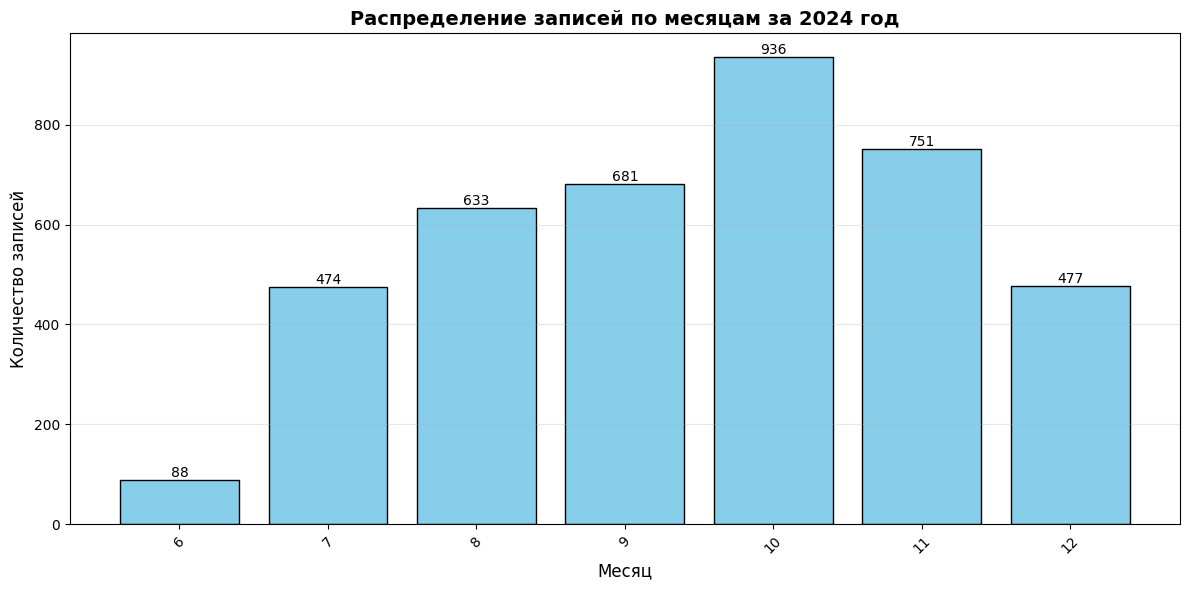

In [22]:
#Результат, полученный человеком

import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что датафрейм уже загружен
# Если нужно преобразовать строку в datetime:
df['published_month'] = pd.to_datetime(df['published_month'], format='%Y-%m')

# Фильтруем данные за 2024 год
df_2024 = df[df['published_month'].dt.year == 2024]

# Группируем по месяцам и считаем количество записей
monthly_counts = df_2024.groupby(df_2024['published_month'].dt.month).size()

# Создаем названия месяцев для подписей
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
               'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

# Визуализация
plt.figure(figsize=(12, 6))

# Столбчатая диаграмма
bars = plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

# Настройки графика
plt.title('Распределение записей по месяцам за 2024 год', fontsize=14, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)
plt.xticks(monthly_counts.index, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

# Результат работы AI-ассистента

Пользователь отправил запрос: Построй график распределения количества опубликованных вакансий за 2024 год по месяцам
LLM отправила результат:

"Как видно на первом графике, распределение количества опубликованных вакансий за 2024 год по месяцам имеет существенные колебания. Всего за год было опубликовано 4040 вакансий, при этом максимальное количество за месяц составило 936, а минимальное - 88. Первый график наглядно демонстрирует эти различия, позволяя выявить месяцы с наиболее высокой и низкой активностью в сфере трудоустройства. Это дает представление о динамике рынка труда и может быть полезно для планирования и стратегических решений. Общий объем вакансий и их распределение по месяцам говорят о том, что 2024 год был достаточно динамичным в плане предложения рабочих мест."
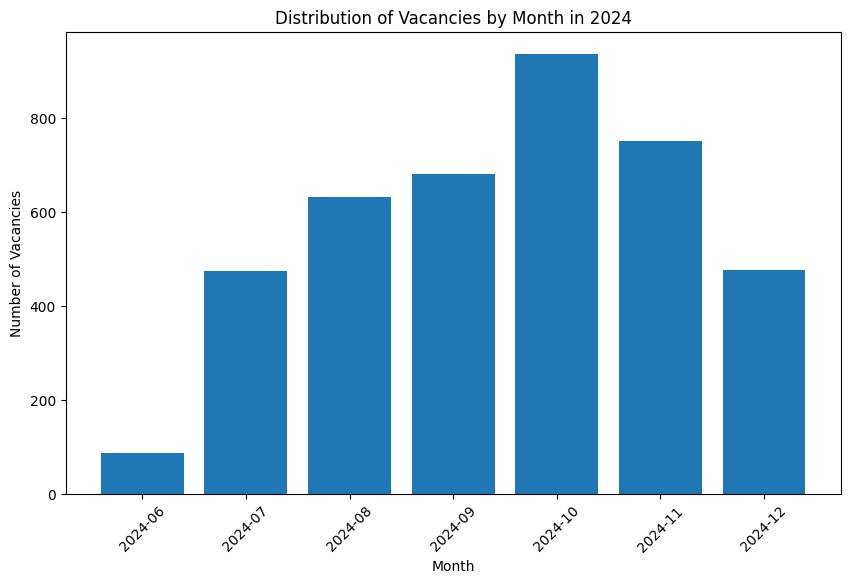


# Сценарий теста №2 : 
Выведи информацию о трёх вакансиях с самыми высокими зарплатами

### Комментарий: 
Тут результат может не совпасть, так как пользователь не уточняет, какие именно зарплаты он считает самыми высокими. 
Считаем, что в следующем MVP будет реализована возможность дозадать пользователю уточняющие вопросы, например, считать по средней зп или по максимальной.
На текущий момент посчитала по средней


In [9]:
#Результат, полученный человеком

# Сортируем по убыванию средней зарплаты и берем топ-3
top_3_salary = df.sort_values('salary_mid', ascending=False).head(3)

# Выводим ключевую информацию о вакансиях
print("Три вакансии с самыми высокими зарплатами (по средней зарплате):\n")
print("-" * 80)

for idx, row in top_3_salary.iterrows():
    print(f"Вакансия #{idx}")
    print(f"Должность: {row['position']}")
    print(f"Компания: {row['company_name']}")
    print(f"Уровень: {row['position_level']}")
    print(f"Зарплата: {row['salary_from']} - {row['salary_to']} {row['salary_currency']}")
    print(f"Средняя зарплата: {row['salary_mid']} {row['salary_currency']}")
    print(f"Период: {row['salary_period']}")
    print(f"Город: {row['primary_city']}")
    print(f"Удаленная работа: {'Да' if row['is_remote'] else 'Нет'}")
    print(f"Стек технологий: {row['stack'][:100]}...")  # первые 100 символов стека
    print("-" * 80)
    print()

Три вакансии с самыми высокими зарплатами (по средней зарплате):

--------------------------------------------------------------------------------
Вакансия #972
Должность: Head of Data Science and RnD
Компания: Selecty
Уровень: C-level
Зарплата: 730000.0 - 1450000.0 RUB
Средняя зарплата: 1090000.0 RUB
Период: month
Город: Москва
Удаленная работа: Нет
Стек технологий: ['Python']...
--------------------------------------------------------------------------------

Вакансия #9969
Должность: VP of Engineering
Компания: getmatch agency
Уровень: C-level
Зарплата: 800000.0 - 1200000.0 RUB
Средняя зарплата: 1000000.0 RUB
Период: month
Город: None
Удаленная работа: Да
Стек технологий: ['.NET', 'PHP', 'Highload', 'Kubernetes', 'MongoDB']...
--------------------------------------------------------------------------------

Вакансия #10095
Должность: Технический директор (СТО)
Компания: Название скрыто (FMCG)
Уровень: C-level
Зарплата: 800000.0 - 1200000.0 RUB
Средняя зарплата: 1000000.0 RUB
Период:

# Результат работы AI-ассистента Сценарий 2

Пользователь отправил запрос: Выведи информацию о трёх вакансиях с самыми высокими зарплатами
LLM отправила результат:

Три вакансии с самыми высокими зарплатами - это "Head of Data Science and RnD" с средней зарплатой 1090000 рублей, "Технический директор (СТО)" и "VP of Engineering" с одинаковой средней зарплатой 1000000 рублей. Как видно на первом графике, эти вакансии имеют значительно более высокие зарплаты, чем другие, что подчеркивает высокий спрос на специалистов высшего уровня. Средние зарплаты этих вакансий варьируются от 1000000 до 1090000 рублей, что указывает на высокий уровень компенсации для руководящих позиций в сфере IT. Эти результаты дают представление о структуре зарплат на рынке труда и могут быть полезны для определения оптимальной зарплаты для подобных вакансий.

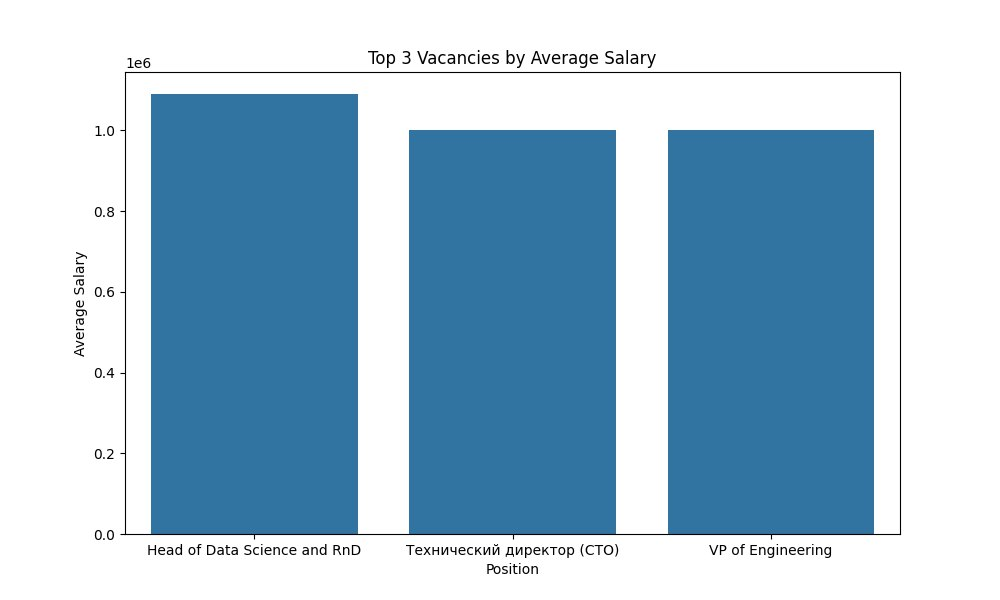


# Сценарий теста №3 : 
Построй график распределения количества вакансий по компаниям. В графике должны быть 10 компаний с наибольшим количеством

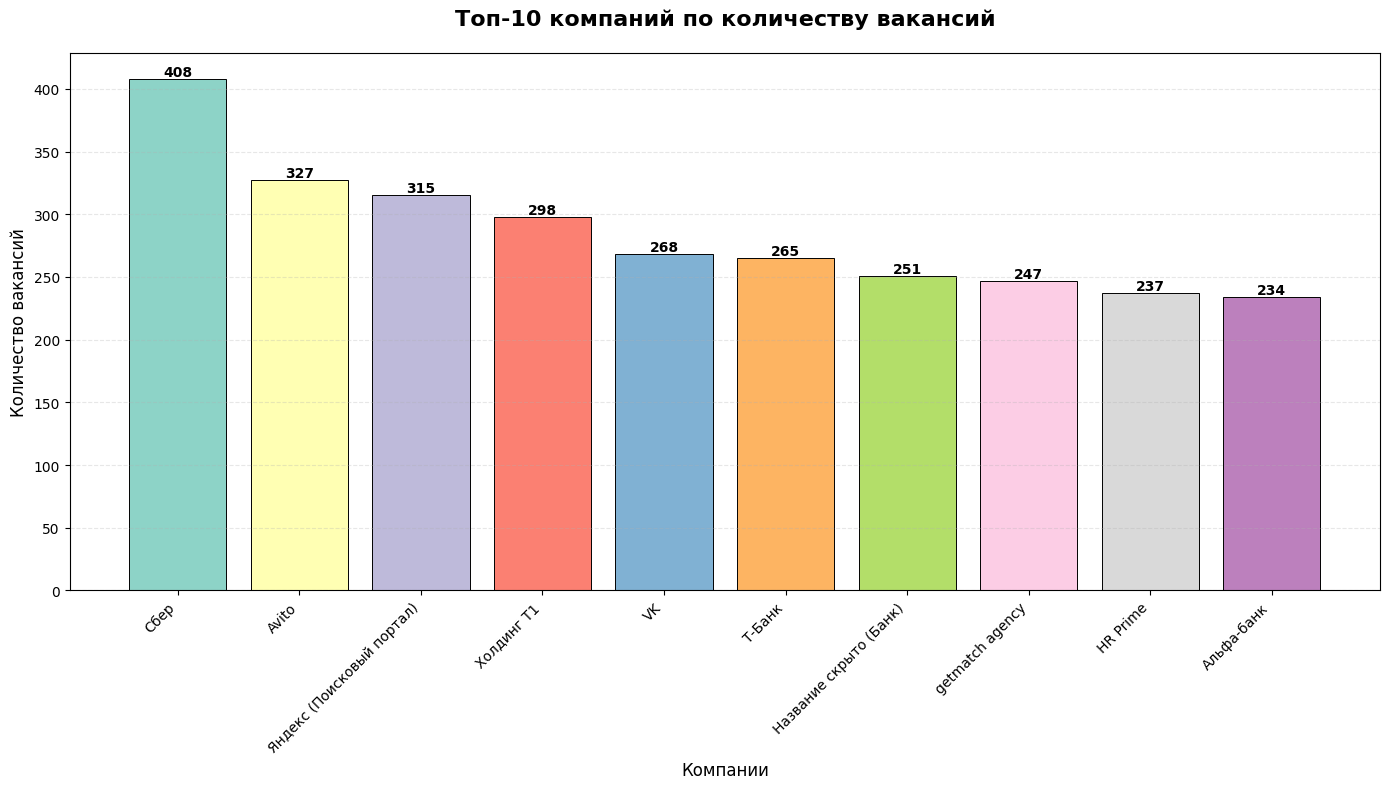

In [10]:
#Результат, полученный человеком

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Подготовка данных: считаем количество вакансий по компаниям
company_vacancies = df['company_name'].value_counts()

# Берем топ-10 компаний
top_10_companies = company_vacancies.head(10)

# Создаем график
plt.figure(figsize=(14, 8))

# Гистограмма (вертикальные столбцы)
bars = plt.bar(top_10_companies.index, top_10_companies.values, 
               color=plt.cm.Set3(np.arange(len(top_10_companies))), 
               edgecolor='black', linewidth=0.7)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Настройка графика
plt.title('Топ-10 компаний по количеству вакансий', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Компании', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Автоматическая настройка отступов для лучшего отображения
plt.tight_layout()

plt.show()

### Результаты работы AI-ассистента. Сценарий 3

Пользователь задал вопрос: Построй график распределения количества вакансий по компаниям. В графике должны быть 10 компаний с наибольшим количеством
AI-помощник предоставил ответ:

Как видно на первом графике, топ-10 компаний с наибольшим количеством вакансий доминируют на рынке, что составляет значительную часть из общего числа 11484 вакансий. Всего в нашем анализе участвуют 531 компания, что указывает на высокую конкуренцию. Первый график явно показывает, какие компании лидируют по количеству вакансий, предоставляя нам ценную информацию о структуре рынка труда. Это позволяет нам сделать вывод, что эти компании являются основными игроками на рынке и, вероятно, имеют большое влияние на рынок труда. Благодаря первому графику мы можем определить лидеров и проанализировать их роль в рынке вакансий.

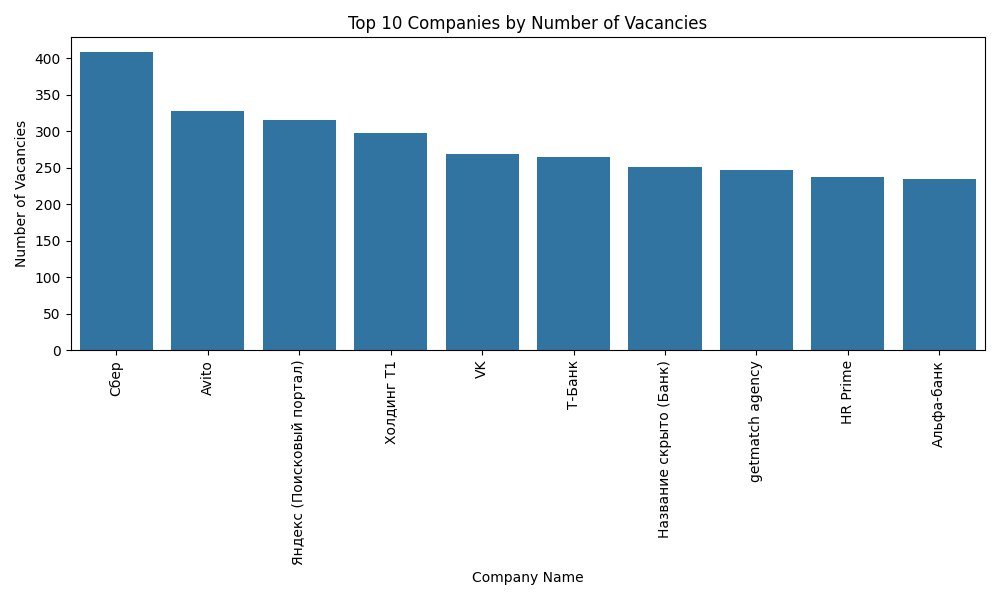



### Сценарий теста №4 : 
Какие навыки чаще всего интересуют работодателей?

Пример данных в поле stack:
[]

Тип данных: <class 'list'>

Всего уникальных навыков: 6112
Всего упоминаний навыков: 52973

Топ-20 самых востребованных навыков:

№  | Навык                       | Количество | Доля (%)
------------------------------------------------------------
 1 | sql                          |       2948 |   5.57%
 2 | python                       |       2497 |   4.71%
 3 | linux                        |       1512 |   2.85%
 4 | postgresql                   |       1477 |   2.79%
 5 | docker                       |       1203 |   2.27%
 6 | kubernetes                   |       1195 |   2.26%
 7 | git                          |       1173 |   2.21%
 8 | ci/cd                        |        934 |   1.76%
 9 | kafka                        |        797 |   1.50%
10 | java                         |        604 |   1.14%
11 | jira                         |        602 |   1.14%
12 | go                           |        571 |   1.08%
13 | grafana                      | 

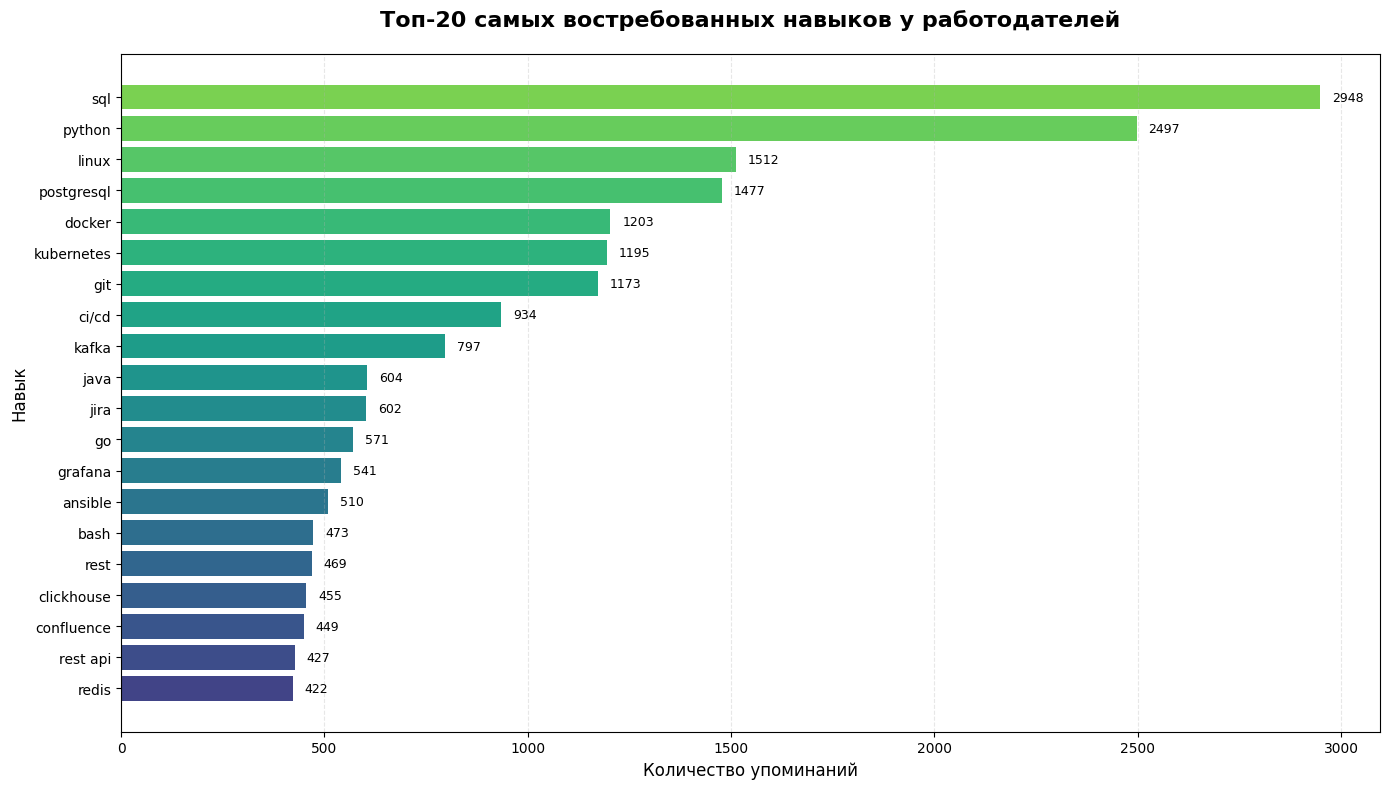

In [11]:
#Результат, полученный человеком

import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import Counter
import numpy as np

# Преобразуем строки со списком навыков в реальные списки Python
# Сначала проверим формат данных
print("Пример данных в поле stack:")
print(df['stack'].iloc[0])
print(f"\nТип данных: {type(df['stack'].iloc[0])}")

# Если stack хранится как строка в формате списка Python
if isinstance(df['stack'].iloc[0], str) and df['stack'].iloc[0].startswith('['):
    try:
        # Преобразуем строки в списки
        df['stack_list'] = df['stack'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
        print("✓ Данные успешно преобразованы из строки в список")
    except:
        # Альтернативный метод если ast.literal_eval не работает
        df['stack_list'] = df['stack'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") 
                                            if pd.notna(x) else [])
else:
    # Если уже список или другой формат
    df['stack_list'] = df['stack']

# Собираем все навыки в один список
all_skills = []
for skills_list in df['stack_list']:
    if isinstance(skills_list, list):
        # Очищаем навыки от лишних пробелов и приводим к нижнему регистру
        cleaned_skills = [str(skill).strip().lower() for skill in skills_list if str(skill).strip()]
        all_skills.extend(cleaned_skills)

# Подсчитываем частоту каждого навыка
skill_counter = Counter(all_skills)

# Берем топ-20 самых частых навыков
top_skills = skill_counter.most_common(20)

print(f"\nВсего уникальных навыков: {len(skill_counter)}")
print(f"Всего упоминаний навыков: {len(all_skills)}")
print(f"\nТоп-20 самых востребованных навыков:\n")

# Выводим таблицу
print("№  | Навык                       | Количество | Доля (%)")
print("-" * 60)
for i, (skill, count) in enumerate(top_skills, 1):
    percentage = (count / len(all_skills)) * 100
    print(f"{i:2} | {skill:28} | {count:10} | {percentage:6.2f}%")

# Строим график
plt.figure(figsize=(14, 8))
skills, counts = zip(*top_skills)
bars = plt.barh(skills[::-1], counts[::-1], color=plt.cm.viridis(np.linspace(0.2, 0.8, len(skills))))

# Добавляем значения
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center', fontsize=9)

plt.title('Топ-20 самых востребованных навыков у работодателей', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Количество упоминаний', fontsize=12)
plt.ylabel('Навык', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### Результаты работы AI-ассистента. Сценарий 4

Пользователь задал вопрос: Какие навыки чаще всего интересуют работодателей?
AI-помощник предоставил ответ:

Как видно на первом графике, наиболее часто интересующим работодателей навыком является SQL, который встречается в 2948 случаях. Это подтверждает высокий спрос на специалистов, владеющих языком структурированных запросов. Среднее количество навыков в стэке составляет 4,61, что указывает на необходимость для сотрудников обладать широким спектром компетенций. Средняя зарплата середины составляет 244898,89, что говорит о относительно высокой оплате труда в этой области. Таким образом, можно сделать вывод, что владение SQL является ключевым навыком для тех, кто хочет быть конкурентоспособным

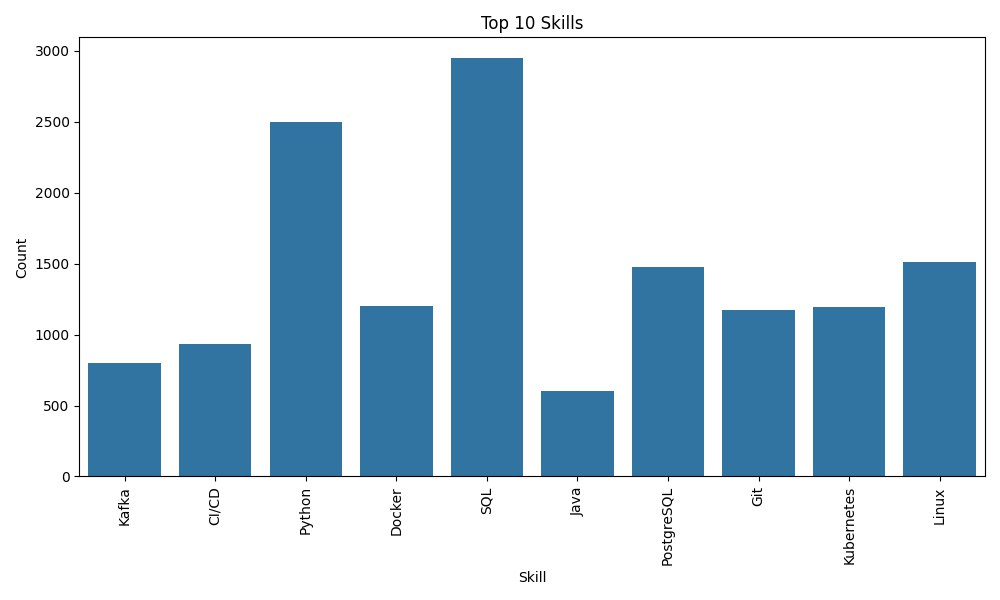


### Сценарий теста №5 : 
Построй распределение количества вакансий и лет требуемого опыта

Всего вакансий с указанием опыта: 9968
Средний требуемый опыт: 3.0 лет
Медианный требуемый опыт: 3.0 лет

Распределение по категориям:
0 лет: 18 вакансий (0.2%)
1-2 года: 2998 вакансий (30.1%)
3-5 лет: 6405 вакансий (64.3%)
6-9 лет: 528 вакансий (5.3%)
10+ лет: 19 вакансий (0.2%)


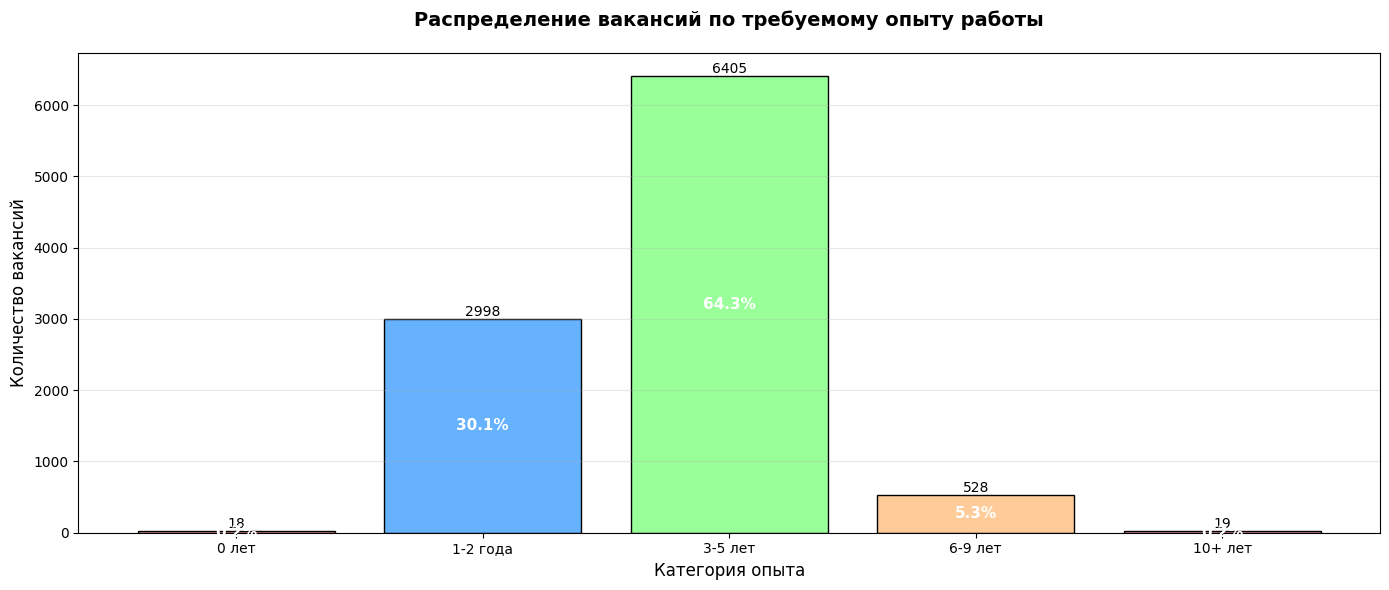

In [12]:
#Результат, полученный человеком

import pandas as pd
import matplotlib.pyplot as plt

# Берем данные по опыту работы
exp_data = df['required_years_experience'].dropna()

# Создаем фигуру
plt.figure(figsize=(14, 6))

# Гистограмма с группировкой по категориям
# Определяем категории
bins = [0, 1, 3, 6, 10, exp_data.max() + 1]
labels = ['0 лет', '1-2 года', '3-5 лет', '6-9 лет', '10+ лет']

# Создаем категории
exp_categories = pd.cut(exp_data, bins=bins, labels=labels, right=False)

# Подсчитываем количество в каждой категории
category_counts = exp_categories.value_counts().sort_index()

# Строим столбчатую диаграмму
bars = plt.bar(category_counts.index, category_counts.values, 
               color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'],
               edgecolor='black')

# Добавляем значения
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom')

# Добавляем проценты
for i, (category, count) in enumerate(category_counts.items()):
    percent = (count / len(exp_data) * 100)
    plt.text(i, count/2, f'{percent:.1f}%', ha='center', va='center',
            color='white', fontweight='bold', fontsize=11)

plt.title('Распределение вакансий по требуемому опыту работы', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Категория опыта', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)

# Выводим статистику
print(f"Всего вакансий с указанием опыта: {len(exp_data)}")
print(f"Средний требуемый опыт: {exp_data.mean():.1f} лет")
print(f"Медианный требуемый опыт: {exp_data.median():.1f} лет")

print("\nРаспределение по категориям:")
for category, count in category_counts.items():
    percent = (count / len(exp_data) * 100)
    print(f"{category}: {count} вакансий ({percent:.1f}%)")

plt.tight_layout()
plt.show()

### Результаты работы AI-ассистента. Сценарий 5

Пользователь задал вопрос: Построй распределение количества вакансий и лет требуемого опыта
AI-помощник предоставил ответ:

Как видно на первом графике, распределение лет требуемого опыта имеет характерный вид, при этом среднее значение лет требуемого опыта составляет 2,98 года, а медиана - 3 года. Это говорит о том, что большинство вакансий требует опыта работы около 3 лет. Общее количество вакансий составляет 11484, что является существенным рыночным объемом. Второй график показывает распределение вакансий по месяцам, но основное внимание при анализе было уделено распределению лет требуемого опыта, которое имеет важное значение для понимания рынка труда. Эти данные могут быть полезны для планирования стратегии набора персонала и определения требований к кандидатам.

# Сценарий теста №6 : 
Покажи, как менялась средняя зарплата в вакансиях по месяцам 2024 года

### Комментарий:
Скорее всего такой результат будет не очень информативен пользователю, но в коде выполнено именно то что он попросил - любая средная зарплата. По факту результат сомнителен, так как не учитываются ни вакансии, ни даже грейды - просто среднее по больнице

Всего вакансий за 2024 год: 4040
Вакансий с указанием зарплаты (salary_mid): 3759


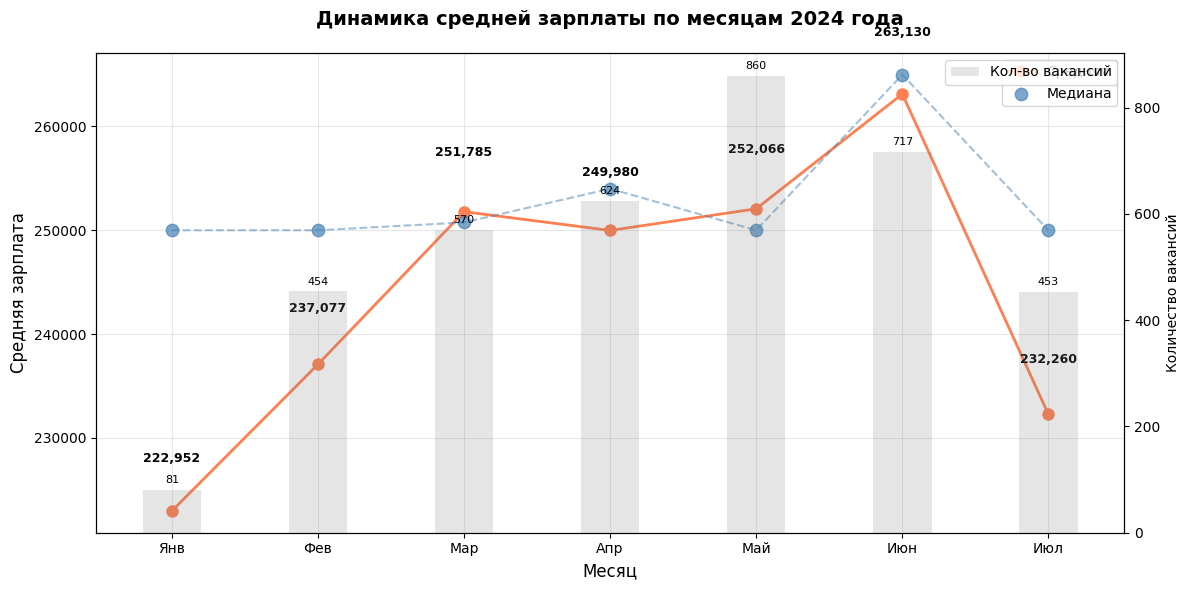


СРЕДНЯЯ ЗАРПЛАТА ПО МЕСЯЦАМ 2024 ГОДА
Месяц    | Средняя    | Медиана    | Кол-во вакансий | Изменение % 
------------------------------------------------------------
Июн      | 222,952    | 250,000    | 81              | +0.0%       
Июл      | 237,077    | 250,000    | 454             | +6.3%       
Авг      | 251,785    | 250,750    | 570             | +12.9%      
Сен      | 249,980    | 254,000    | 624             | +12.1%      
Окт      | 252,066    | 250,000    | 860             | +13.1%      
Ноя      | 263,130    | 265,000    | 717             | +18.0%      
Дек      | 232,260    | 250,000    | 453             | +4.2%       

ОБЩАЯ СТАТИСТИКА ЗА 2024 ГОД:
Средняя зарплата за год: 248,963
Медианная зарплата за год: 250,000
Рост за период: +4.2%
Месяц с максимальной средней зарплатой: Ноя (263,130)
Месяц с минимальной средней зарплатой: Июн (222,952)


In [18]:
#Результат, полученный человеком

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Фильтруем данные за 2024 год
df_2024 = df[df['published_year'] == 2024].copy()

# Проверяем наличие данных
print(f"Всего вакансий за 2024 год: {len(df_2024)}")
print(f"Вакансий с указанием зарплаты (salary_mid): {df_2024['salary_mid'].notna().sum()}")

# Группируем по месяцам и считаем среднюю зарплату
monthly_salary = df_2024.groupby(df_2024['published_month'].dt.month)['salary_mid'].agg(['mean', 'count', 'median']).round()

# Сортируем по месяцам
monthly_salary = monthly_salary.sort_index()

# Создаем названия месяцев
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
               'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

# Создаем график
plt.figure(figsize=(12, 6))

# Линейный график средней зарплаты
line = plt.plot(monthly_salary.index, monthly_salary['mean'], 
                marker='o', linewidth=2, markersize=8, color='coral', label='Средняя')

# Добавляем точки с медианной зарплатой
plt.scatter(monthly_salary.index, monthly_salary['median'], 
            color='steelblue', s=80, alpha=0.7, zorder=5, label='Медиана')

# Соединяем медианы пунктиром
plt.plot(monthly_salary.index, monthly_salary['median'], 
         linestyle='--', color='steelblue', alpha=0.5)

# Добавляем значения средних зарплат на график
for i, (month, row) in enumerate(monthly_salary.iterrows()):
    if pd.notna(row['mean']):
        plt.text(month, row['mean'] + row['mean'] * 0.02, 
                f'{int(row["mean"]):,}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настройки графика
plt.title('Динамика средней зарплаты по месяцам 2024 года', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средняя зарплата', fontsize=12)
plt.xticks(monthly_salary.index, month_names[:len(monthly_salary)], rotation=0)
plt.grid(True, alpha=0.3)
plt.legend()

# Добавляем информацию о количестве вакансий
ax2 = plt.gca().twinx()
bars = ax2.bar(monthly_salary.index, monthly_salary['count'], 
               alpha=0.2, color='gray', width=0.4, label='Кол-во вакансий')

# Добавляем значения количества вакансий
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + max(monthly_salary['count']) * 0.01,
            f'{int(height)}', ha='center', va='bottom', fontsize=8)

ax2.set_ylabel('Количество вакансий', fontsize=10)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Выводим таблицу с данными
print("\n" + "="*60)
print("СРЕДНЯЯ ЗАРПЛАТА ПО МЕСЯЦАМ 2024 ГОДА")
print("="*60)
print(f"{'Месяц':<8} | {'Средняя':<10} | {'Медиана':<10} | {'Кол-во вакансий':<15} | {'Изменение %':<12}")
print("-" * 60)

# Рассчитываем изменение относительно первого месяца
base_salary = monthly_salary.iloc[0]['mean']
for month, row in monthly_salary.iterrows():
    month_name = month_names[month-1] if month <= len(month_names) else f"М{month}"
    
    if pd.notna(row['mean']):
        change_pct = ((row['mean'] - base_salary) / base_salary * 100) if base_salary > 0 else 0
        change_str = f"{change_pct:+.1f}%"
    else:
        change_str = "—"
    
    mean_str = f"{int(row['mean']):,}" if pd.notna(row['mean']) else "—"
    median_str = f"{int(row['median']):,}" if pd.notna(row['median']) else "—"
    
    print(f"{month_name:<8} | {mean_str:<10} | {median_str:<10} | {int(row['count']):<15} | {change_str:<12}")

# Общая статистика
print("\n" + "="*60)
print("ОБЩАЯ СТАТИСТИКА ЗА 2024 ГОД:")
print("="*60)
print(f"Средняя зарплата за год: {df_2024['salary_mid'].mean():,.0f}")
print(f"Медианная зарплата за год: {df_2024['salary_mid'].median():,.0f}")
print(f"Рост за период: {((monthly_salary.iloc[-1]['mean'] - monthly_salary.iloc[0]['mean']) / monthly_salary.iloc[0]['mean'] * 100):+.1f}%")
print(f"Месяц с максимальной средней зарплатой: {month_names[monthly_salary['mean'].idxmax()-1]} ({monthly_salary['mean'].max():,.0f})")
print(f"Месяц с минимальной средней зарплатой: {month_names[monthly_salary['mean'].idxmin()-1]} ({monthly_salary['mean'].min():,.0f})")

### Результаты работы AI-ассистента. Сценарий 6

Пользователь задал вопрос: Покажи, как менялась средняя зарплата в вакансиях по месяцам 2024 года
AI-помощник предоставил ответ:
демонстрировала тенденцию к увеличению по месяцам 2024 года, достигнув максимального значения в ноябре - 263129,98 руб. Анализ данных показывает, что средняя зарплата в июне была на уровне 222951,85 руб., а к концу года снизилась до 232260,39 руб. в декабре. Общий рост средней зарплаты с июня по ноябрь составил более 18%, что указывает на положительную динамику на рынке труда. Первый график наглядно иллюстрирует эту тенденцию, позволяя оценить динамику средней зарплаты в вакансиях по месяцам 2024 года.

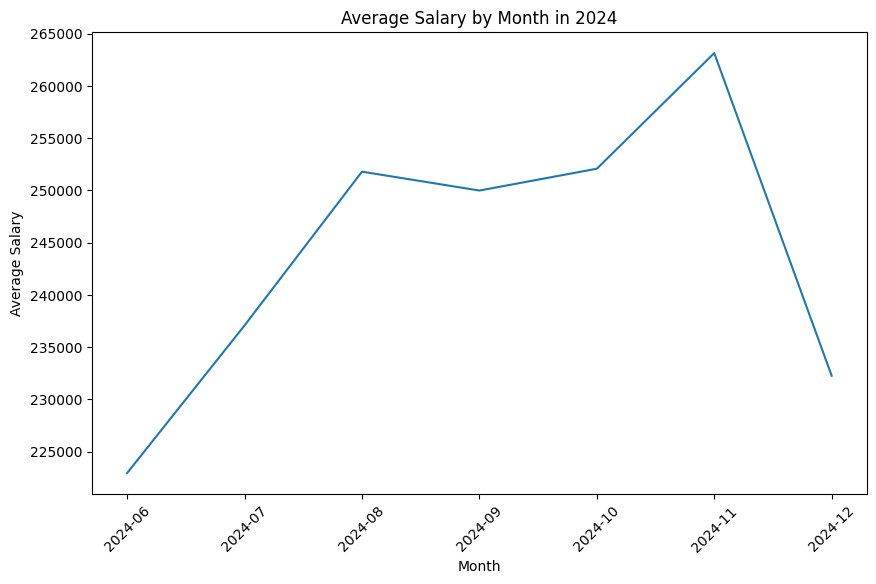


### Сценарий теста №7 : 
Выведи ТОП-3 самых востребованных специальностей

In [19]:
#Результат, полученный человеком

import pandas as pd

# Топ-3 самых частых специальностей
top_3 = df['position'].value_counts().head(3)

print("ТОП-3 ВОСТРЕБОВАННЫХ СПЕЦИАЛЬНОСТЕЙ:")
print("=" * 40)

for i, (position, count) in enumerate(top_3.items(), 1):
    percentage = (count / len(df) * 100)
    print(f"{i}. {position}")
    print(f"   Вакансий: {count} ({percentage:.1f}%)")
    print()

ТОП-3 ВОСТРЕБОВАННЫХ СПЕЦИАЛЬНОСТЕЙ:
1. Системный аналитик
   Вакансий: 148 (1.3%)

2. DevOps-инженер
   Вакансий: 98 (0.9%)

3. DevOps Engineer
   Вакансий: 86 (0.7%)



### Результаты работы AI-ассистента. Сценарий 7

Пользователь задал вопрос: Выведи ТОП-3 самых востребованных специальностей
AI-помощник предоставил ответ:

Как видно на первом графике, топ 3 самых востребованных специальностей включают в себя DevOps, System Analyst и Product Analyst. Метрики показывают, что DevOps лидирует с 746 запросами, за ним следует System Analyst с 517 запросами и Product Analyst с 485 запросами. Эти цифры демонстрируют значительный интерес к техническим специальностям. Первый график наглядно иллюстрирует распределение спроса на эти специальности, что позволяет нам сделать вывод о приоритетности направлений развития в этой области. В целом, данные свидетельствуют о высоком спросе на специалистов в области информационных технологий, особенно в сфере DevOps.


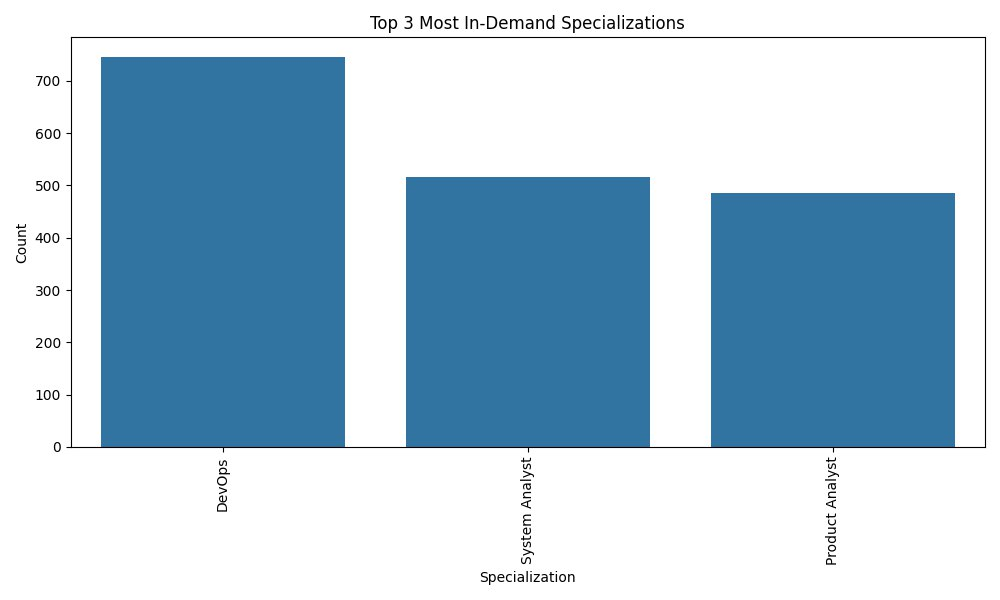


# Сценарий теста №8 : 
Покажи, как средняя зарплата меняется в зависимости от грейда

### Комментарий:
В коде, написанном человеком не учитывается, что вакансии могут иметь похожие названия. а вот LLM это учла - её результат лучше.

In [20]:
#Результат, полученный человеком

import pandas as pd

# Топ-3 самых частых специальностей
top_3 = df['position'].value_counts().head(3)

print("ТОП-3 ВОСТРЕБОВАННЫХ СПЕЦИАЛЬНОСТЕЙ:")
print("=" * 40)

for i, (position, count) in enumerate(top_3.items(), 1):
    percentage = (count / len(df) * 100)
    print(f"{i}. {position}")
    print(f"   Вакансий: {count} ({percentage:.1f}%)")
    print()

ТОП-3 ВОСТРЕБОВАННЫХ СПЕЦИАЛЬНОСТЕЙ:
1. Системный аналитик
   Вакансий: 148 (1.3%)

2. DevOps-инженер
   Вакансий: 98 (0.9%)

3. DevOps Engineer
   Вакансий: 86 (0.7%)



### Результаты работы AI-ассистента. Сценарий 8

Пользователь задал вопрос: Покажи, как средняя зарплата меняется в зависимости от грейда
AI-помощник предоставил ответ:

Как видно на первом графике, средняя зарплата меняется в зависимости от грейда, где лидеры получают в среднем 328518.74 рубля, значительно больше, чем средние и старшие специалисты. Метрики показывают, что средняя зарплата лидов составляет 328518.74 рубля, средних специалистов - 218096.22 рубля, а старших специалистов - 257601.33 рубля. Это говорит о том, что грейд существенно влияет на размер заработной платы. Первый график наглядно демонстрирует эту тенденцию, подчеркивая значительный разрыв между лидерами и другими категориями. Таким образом, можно сделать вывод, что грейд является важным фактором, определяющим уровень зарплаты.


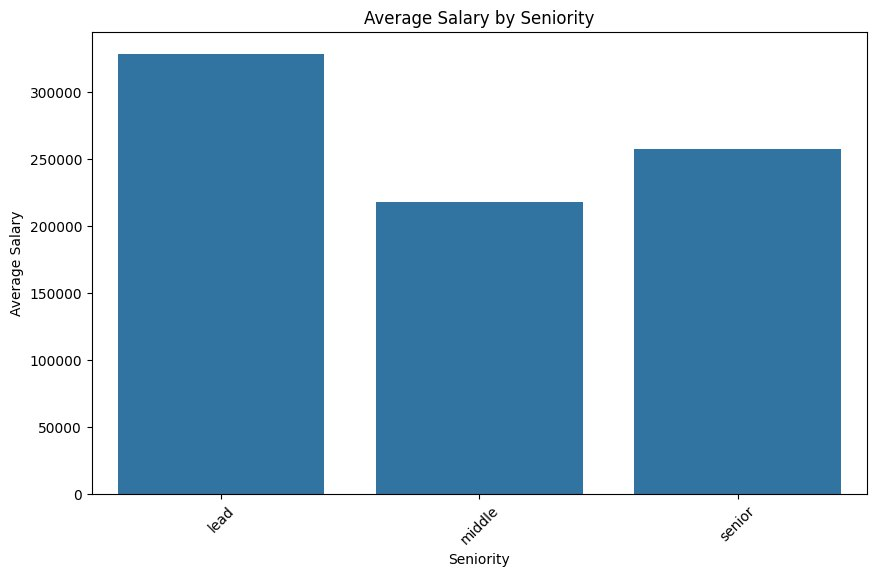